<p style='text-align:center;font-family: sans-serif;font-weight:bold;color:#616161;font-size:25px;margin: 30px;'>Machine Learning</p>
<p style='text-align:center;font-family: sans-serif ;font-weight:bold;color:black;font-size:30px;margin: 10px;'>Logistic Regression <font color='#08B4E4'>Beginners</font></p>
<p style="text-align:center;font-family: sans-serif ;font-weight:bold;color:#616161;font-size:20px;margin: 30px;">classification</p>

<b>본 문서는 여러 머신러닝 모델들을 이론과 알고리즘, 튜닝 위주로 설명하는 자료이며 '데이터 사이언스 스쿨의 6.1 로지스틱 회귀분석'을 참조하여 만들었습니다. 개인의 공부 기록용으로 만들었습니다.</b>
Reference: https://datascienceschool.net/03%20machine%20learning/10.01%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.html

---

로지스틱 회귀분석은 회귀, 분류 문제 모두에 사용할 수 있으며 주로 분류 문제를 해결할 때 사용하는 머신러닝 모델입니다. 로지스틱 모형은 모수 모형이기 때문에 몇 가지 가정이 필요합니다.  
<br>
가정: 종속변수는 이항분포를 따르며, 이 때 모수 p는 x에 의존한다.  
<br>
이항분포의 모수 p는 사건이 발생할 확률을 의미합니다. 예를 들어 동전을 한 번 던질 때 앞면이 나올 확률은 0.5이며 p에 해당합니다. 동전을 5번 던졌을 때 앞면이 나온 횟수를 확률변수로 설정하면 이항분포가 생성됩니다. 만약 동전의 앞면이 나올 확률에 영향을 주는 인자 x1과 x2가 있다고 해봅시다. 동일한 x1, x2를 대상으로 동전의 앞면이 3번 나올 확률을 구해보면 같은 값을 가집니다. 하지만 x1이 서로 다른 경우 확률을 달라집니다. 이런 경우 모수 p는 x1과 x2에 의존한다고 합니다. 로지스틱 회귀 모형이 의미를 가지기 위해선 위와 같은 상황이어야 합니다.  
이번 노트에서 다룰 데이터셋은 y가 0과 1로 구분되는 이진 분류 데이터셋으로, y는 베르누이 분포(이항분포의 N=1인 경우)를 따릅니다. 총 39가지 feature가 존재하며 이들은 y에 영향을 주는 인자들입니다. 우리는 x가 주어졌을 때 y가 1일 조건부 확률을 구하는 것을 목표로 로지스틱 회귀모형을 만들 수 있습니다.

로지스틱 회귀모형에서 y의 베르누이 모수 p는 f(x)로 가정하며, f(x)는 0과 1 사이의 값만 가질 수 있는 시그모이드를 사용합니다. 가장 대표적인 시그모이드 함수는 로지스틱 함수로, 다음과 같습니다.  
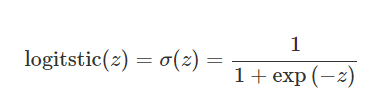
베르누이 분포에서 1이 나올 확률 p와 0이 나올 확률 1 - p의 비율을 오즈라고 합니다.
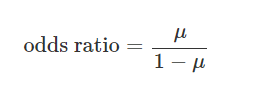
p는 0 ~ 1 사이의 값을 가지기 때문에 오즈값의 범위는 0 ~ 양의 무한대입니다. 오즈에 로짓변환을 해주면 음의 무한대 ~ 양의 무한대로 값의 범위가 넓어집니다. 이 함수의 역함수는 자연스럽게 음의 무한대 ~ 양의 무한대의 x축을 가지며, 이에 따라 0 ~ 1 사이의 y값을 갖게 됩니다. 이 함수를 로지스틱 함수라고 합니다. 즉 로지스틱 함수는 로그오즈의 값에 따른 모수(1일 확률)를 출력하는 함수입니다.

일반적으로 로지스틱 함수의 입력값은 z로 표기하며 다음의 규칙을 따릅니다.  
z == 0 -> p = 0.5  
z > 0 -> p > 0.5  ~ 1  
z < 0 -> p < 0.5  ~ 0  
z값에 따라 p가 바뀌며 0을 기준으로 1 or 0으로 구분해줍니다. 따라서 z는 판별기라고 불리며, 로지스틱 회귀에서 z는 선형함수이므로 선형 판별함수라고 합니다. z는 다음과 같습니다.
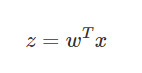
이 식은 선형회귀식입니다. 즉 선형경계선이 형성되어있을 때, 그보다 위에 있는 포인트는 1, 아래에 있는 포인트는 0으로 구분됩니다. 올바른 선형판별식이 세워진다면 포인트가 주어졌을 때 0인지 1인지 판단할 수 있으며, 이는 통계적으로 x에 따른 y의 조건부 확률을 구하는 것과 동일합니다. 따라서 로지스틱 회귀 모형을 구하는 것은 데이터를 잘 나눌 수 있는 선형회귀식을 찾는 것과 동일한 문제가 됩니다.

선형판별식의 w는 MLE를 사용해서 추정할 수 있습니다. MLE는 현재 실제로 관측된 값을 모수라고 추정하는 방법입니다. 앞서 x가 주어졌을 때 y가 1일 확률 p는 로지스틱 함수로 표현할 수 있다고 했습니다. 로지스틱 함수의 z는 w와 x로 표현된 선형식으로 표현할 수 있습니다. 따라서 임의의 관측치의 베르누이 우도값은 다음과 같습니다.
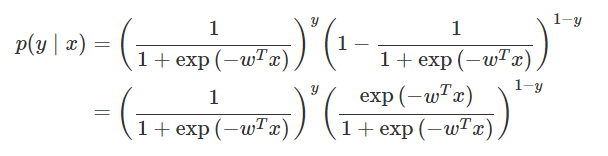
위 식은 단일 관측치에 대한 우도값이며, 현재 주어진 데이터셋의 모든 관측치를 대상으로 우도값을 구한 뒤 로그를 취하면 다음과 같습니다.
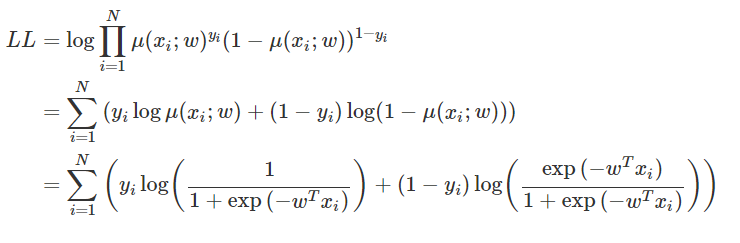
모든 관측치의 우도의 곱은 '현재 주어진 데이터셋(사실)의 우도값'이며 MLE에 의해 이 값을 최대값이 되어야 합니다. 따라서 로그변환된 식은 최소가 되어야 합니다. 최소값을 구하기 위해 w로 미분하면 다음과 같은 식이 도출됩니다.
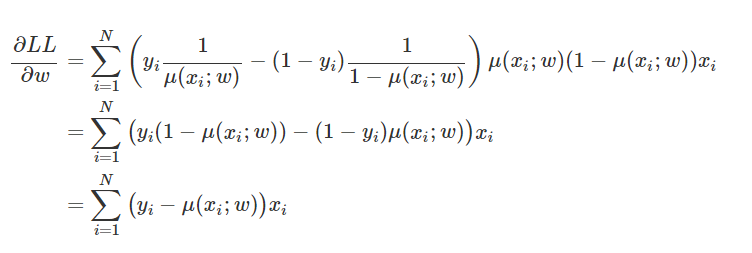
위 식에서 그레디언트가 0이 되는 w가 최적의 값이지만, 수식 자체가 비선형이므로 그레디언트가 0이 되는 w를 바로 찾을 수 없습니다. 따라서 경사하강법 등의 방법을 사용하여 옵티멀에 도달하게 됩니다. 다음 식은 경사하강법을 적용하여 w를 업데이트하는 식입니다.
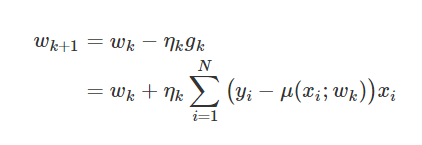

사용할 예제 데이터는 캐글 컴패티션: 타이타닉의 데이터셋을 직접 가공한 데이터입니다. 클랜징 - 파생변수 생성(합성, 바이닝, 파싱 등) - 연속형 변수의 로그변환 - 순서형 변수의 라벨인코딩 - 등간변수의 원핫인코딩을 적용하였습니다. 여기서 주의할 점은 로지스틱 회귀분석의 가정은 단지, y가 이항분포(or 베르누이)를 따르며, 모수가 x에 의존한다는 것 뿐이라는 것입니다. 따라서 독립변수 간의 독립성이나 정규성이 만족되지 않아도 충분히 사용할 수 있습니다. 연속형 변수의 로그변환은 독립변수의 정규성 확보를 위한 태크닉이며 선형 회귀 모형에서 성능 향상을 도모할 수 있으나 이번 파트에서는 큰 영향이 없습니다.

In [10]:
import numpy as np
import pandas as pd

X_train = pd.read_csv('../Data/titanic_xtrain.csv')
X_test = pd.read_csv('../Data/titanic_xtest.csv')
y_train = pd.read_csv('../Data/titanic_ytrain.csv')
y_test = pd.read_csv('../Data/titanic_ytest.csv')

모든 전처리 과정을 마친 훈련데이터입니다. 첫 컬럼은 사용자 id로 제거 대상입니다.

In [11]:
X_train

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,CabinCnt,Family,Sex_female,Sex_male,...,TicketType_sotonoq,TicketType_stono2,TicketType_wc,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Title_Rev
0,0,0.840447,-0.255698,0.930628,-0.519295,-0.896331,-0.515692,0.461935,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,-1.550118,0.621932,0.930628,-0.519295,1.347870,1.559341,0.461935,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0.840447,0.010786,-0.616256,-0.519295,-0.815013,-0.515692,-0.718847,1,0,...,0,1,0,0,0,1,0,0,0,0
3,3,-1.550118,0.488904,0.930628,-0.519295,1.048255,1.559341,0.461935,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0.840447,0.488904,-0.616256,-0.519295,-0.800632,-0.515692,-0.718847,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,-0.354835,0.071228,-0.616256,-0.519295,-0.349500,-0.515692,-0.718847,0,1,...,0,0,0,0,0,0,0,0,0,1
885,887,-1.550118,-0.487978,-0.616256,-0.519295,0.472468,1.559341,-0.718847,1,0,...,0,0,0,0,0,1,0,0,0,0
886,888,0.840447,0.129548,0.930628,2.125105,0.227038,-0.515692,1.642717,1,0,...,0,0,1,0,0,1,0,0,0,0
887,889,-1.550118,0.010786,-0.616256,-0.519295,0.472468,1.559341,-0.718847,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train = y_train.Survived
y_test = y_test.Survived

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

아무런 튜닝없이 로지스틱 회귀모형을 생성하여 교차검증 점수와 테스트 점수를 확인해봅니다. 교차검증은 불균형 방지를 위해 StratifiedKFold를 사용합니다. 점수는 가장 일반적으로 많이 사용하는 AUC를 사용합니다.

In [52]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
val_score = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv, n_jobs=-1, scoring='roc_auc').mean()
test_score = roc_auc_score(y_test, LogisticRegression().fit(X_train, y_train).predict(X_test))
print(f'Logistic Regression - No tuning + cross validation roc auc score: {val_score:f}')
print(f'Logistic Regression - No tuning + test roc auc score: {test_score:f}')

Logistic Regression - No tuning + cross validation roc auc score: 0.867363
Logistic Regression - No tuning + test roc auc score: 0.751826


교차검증 점수와 테스트 점수의 차이가 크게 벌어집니다. 이런 현상은 과적합으로 인해 발생합니다. 우리의 목표는 일반화 성능이 좋은 모형을 만드는 것입니다. 일반화 성능을 높이는 방법은 다양하지만 크게 Feature Engineering과 Model Tuning으로 구분됩니다. 이번 문서에서는 FE가 핵심이 아니므로 GridSearchCV를 사용해서 tuning을 해보는 방향으로 최적화해보겠습니다. 튜닝을 하기 위해선 먼저 로지스틱 회귀분석의 하이퍼 파라미터들을 이해할 필요가 있습니다. 자세한 내용은 아래 사이트에서 확인할 수 있습니다.  
Refernce: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

penalty: 로지스틱의 선형판별식의 과적합을 방지하기 위해 임베딩을 적용합니다. 기본값은 None이며  l1, l2, elasticNet을 적용할 수 있습니다. 주의할 점은 penalty는 solver의 영향을 받기 때문에 특정 상황에서 동작하지 않을 수 있습니다.  
tol: 정지 규칙의 허용오차입니다. 기본값은 1e-4입니다.  
C: 정규화 강도입니다. 작을수록 강도가 세집니다. 기본값은 1입니다.   
fit_intercept: 기본값은 True이며, True인 경우 상수항이 추가됩니다.  
solver: 최적화 알고리즘입니다. newton-cg / lbfgs / liblinear / sag / saga 로 나뉘며, 기본값은 liblinear입니다.  
작은 규모의 데이터셋에는 liblinear, 큰 규모에선 sag, saga가 빠르게 동작합니다. 다중 분류 문제의 경우 newton-cg, sag, saga, lbfgs를 사용하며 liblinear는 사용할 수 없습니다.  
max_iter: 기본값은 100입니다. solver의 최대 반복 횟수를 결정합니다.

In [48]:
model_logistic = LogisticRegression()
params_logistic = {
    'penalty': ['None', 'l1', 'l2', 'elasticNet'],
    'tol': [1e-5, 1e-4, 1e-3],
    'C': [.001, .01, .1, 1, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400]
}
search_logistic = GridSearchCV(model_logistic, params_logistic, cv=cv, n_jobs=-1, verbose=0, scoring='roc_auc').fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [49]:
cv_rlt = pd.DataFrame(search_logistic.cv_results_)
cv_rlt.iloc[cv_rlt.rank_test_score.sort_values().index].head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
692,0.0048,0.001166,0.0032,0.000748,0.1,400,l2,liblinear,0.001,"{'C': 0.1, 'max_iter': 400, 'penalty': 'l2', '...",0.890642,0.846457,0.848262,0.892112,0.869064,0.869307,0.019699,1
632,0.0042,0.000748,0.0030,0.000894,0.1,300,l2,liblinear,0.001,"{'C': 0.1, 'max_iter': 300, 'penalty': 'l2', '...",0.890642,0.846457,0.848262,0.892112,0.869064,0.869307,0.019699,1
512,0.0042,0.000400,0.0030,0.000633,0.1,100,l2,liblinear,0.001,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.890642,0.846457,0.848262,0.892112,0.869064,0.869307,0.019699,1
572,0.0038,0.000400,0.0026,0.000490,0.1,200,l2,liblinear,0.001,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', '...",0.890642,0.846457,0.848262,0.892112,0.869064,0.869307,0.019699,1
570,0.0054,0.000800,0.0034,0.000490,0.1,200,l2,liblinear,0.00001,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', '...",0.890642,0.846457,0.848128,0.892112,0.869064,0.869281,0.019728,5


In [58]:
print(roc_auc_score(y_test, LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear', tol=0.001).fit(X_train, y_train).predict(X_test)))
print(roc_auc_score(y_test, LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear', tol=0.00001).fit(X_train, y_train).predict(X_test)))

0.7526290165530671
0.7526290165530671


튜닝을 했으나 여전히 과적합 현상이 발생했다. 로지스틱 회귀모형은 좋은 성능을 위해 사용하기 보다 분류 문제의 베이스라인 모형으로 빠르게 시도해볼 수 있는 좋은 수단이다.